# k-최근접 이웃 회귀
회귀는 지도학습의 한 종류로 두 변수 사이의 상관관계를 분석하는 방법이다.

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

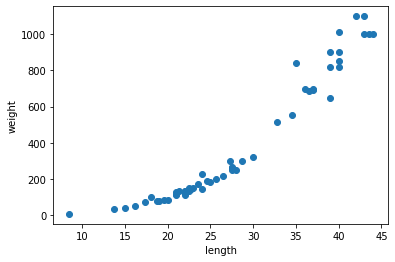

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [6]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [7]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [8]:
print(test_array)

[[1 2]
 [3 4]]


-1 을 넣어주면 배열의 전체 원소 개수를 매번 외우지 않아도 되므로 편리하다.

In [10]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [11]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [12]:
print(knr.score(test_input, test_target))

0.992809406101064


###결정계수
$$R^2 = 1 - {(타깃 - 예측)^2 의 합 \over (타깃 - 평균)^2의 합}$$   
 타깃의 평균 정도를 예측하는 수준이라면 0에 가까워지고 예측이 타깃에 아주 가까워지면 1에 가까워진다.

In [14]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산한다.
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


위에서 볼 수 있듯 예측이 평균적으로 19g 정도 타깃값과 다르다.

In [15]:
print(knr.score(train_input, train_target))

0.9698823289099254


###과대적합  / 과소적합 (overfitting / underfitting)
훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련세트에 과대적합 되었다고 한다. 즉 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것이다.   
반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 모델이 훈련 세트에 과소적합 되었다고 말한다. 즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다. 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요하다.

In [19]:
# 이웃의 개수를 3으로 설정한다.
knr.n_neighbors = 3

# 모델을 다시 훈련시킨다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [20]:
print(knr.score(test_input, test_target))

0.9746459963987609
